<a href="https://colab.research.google.com/github/Kirtiwardhan01/Computer-Vision-/blob/master/facial-expression-recognition-from-stream.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Real Time Facial Expression Recognition on Streaming Data

#### Face Detection

Opencv enables to detect human faces with a few lines of code

In [0]:
#import numpy and opencv
import numpy as np
import cv2

In [0]:
#We point OpenCV's Cascasde Classifier function to where our classifier (XML format) is stored
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml') 

#https://stackoverflow.com/questions/30508922/error-215-empty-in-function-detectmultiscale

In [0]:
#load our image anf then convert it to gray scale
image = cv2.imread('/content/friends.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

In [0]:
#Our Classifier returns the ROI of the detected face as tuple
#It stores the top left coordinates and the bottom right coordinates

faces = face_cascade.detectMultiScale(gray,1.3,5)

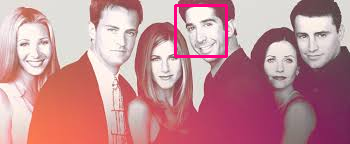

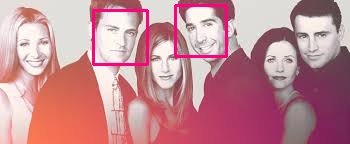

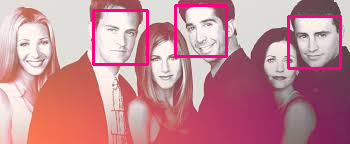

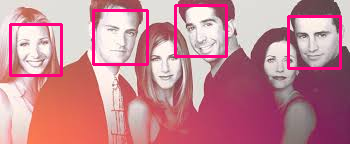

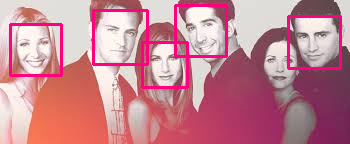

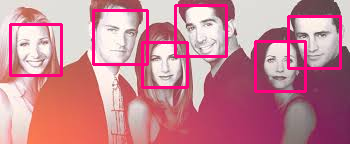

In [6]:
from google.colab.patches import cv2_imshow
for (x,y,w,h) in faces:
    cv2.rectangle(image,(x,y),(x+w,y+h),(127,0,255),2)
    cv2_imshow(image)
    

In this way, we can detect human faces easily.

**Streaming Data**

What would be if the source were cam instead of a steady image? We can get help from opencv again.

In [0]:
	
cap = cv2.VideoCapture(0)
 
while(True):
  ret, img = cap.read()
 
#apply same face detection procedures
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
 
for (x,y,w,h) in faces:
  cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
 
  if cv2.waitKey(1) & 0XFF == ord('q'):
    break     #press q to quit

 
cap.release()
cv2.destroyAllWindows()

No matter what the source is (steady image or cam), it seems that we can detect faces. Once coordinates of detected faces calculated, we can extract them from the original image. The following code should be put in the faces for iteration. We also need to gray scale and 48×48 resized image to recognize its facial expression based on facial expression recognition requirements.

In [7]:
detected_face = img[int(y):int(y+h), int(x):int(x+w)] #crop detected face
detected_face = cv2.cvtColor(detected_face, cv2.COLOR_BGR2GRAY) #transform to gray scale
detected_face = cv2.resize(detected_face, (48, 48)) #resize to 48x48

NameError: ignored

**Expression Analysis**

In previous post, we’ve constructed a model and train it to recognize facial expressions. We would use same pre-constructed model and its pre-trained weights

In [26]:
from keras.models import model_from_json
model = model_from_json(open("/content/facial_expression_model_structure.json").read())
model.load_weights('/content/facial_expression_model_weights.h5') #load weights


JSONDecodeError: ignored

Now, we can classifiy the facial expression of detected faces on a image

In [0]:
img_pixels = image.img_to_array(detected_face)
img_pixels = np.expand_dims(img_pixels, axis = 0)
 
img_pixels /= 255
 
predictions = model.predict(img_pixels)
 
#find max indexed array
max_index = np.argmax(predictions[0])
 
emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
emotion = emotions[max_index]
 
cv2.putText(img, emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)

**Evaluation**

Applying the both face detection and facial expression recognition procedures on a image seems very successful.

Also, applying same procedures to a video stream data seems very satisfactory

Besides, we can apply this for web cam streaming. We try to act all emotion candidates.